In [15]:
import numpy as np
from torchvision import datasets
import matplotlib.pyplot as plt

# Download and load the MNIST dataset

In [16]:
def load_mnist_data():
    """
    Load and preprocess the MNIST dataset.

    Returns:
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): One-hot encoded training labels.
        X_test (np.ndarray): Test features.
        y_test (np.ndarray): One-hot encoded test labels.
    """
    
    train_dataset = datasets.MNIST(root="./data", train=True, download=True)
    test_dataset = datasets.MNIST(root="./data", train=False, download=True)

    # Convert data to float32 and normalize by dividing by 255
    X_train = train_dataset.data.numpy().astype("float32") / 255
    y_train = train_dataset.targets.numpy()
    X_test = test_dataset.data.numpy().astype("float32") / 255
    y_test = test_dataset.targets.numpy()

    # Reshape each image (28x28) to a flat vector (784,)
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    # One-hot encoding for labels
    y_train = np.eye(10)[y_train]
    y_test = np.eye(10)[y_test]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_mnist_data()

# Define a simple neural network using numpy and helper functions

In [17]:

def softmax(z):
    """
    Softmax activation function that converts logits into probabilities.

    Args:
        z (np.ndarray): The input logits of shape (N, K), 
                        where N is the number of samples and K is the number of classes.

    Returns:
        np.ndarray: The output probabilities of shape (N, K), 
                    where each row contains the class probabilities for a sample.
    """
    exp_z = np.exp(z)  # Exponentiate each logit (element-wise)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)  # Normalize along classes (axis=1)


def calculate_accuracy(y_pred, y):
    """
    Calculate the accuracy of predictions.

    Args:
        y_pred (np.ndarray): Predicted probabilities of shape (N, K), 
                             where N is the number of samples and K is the number of classes.
        y (np.ndarray): True labels of shape (N, K), one-hot encoded.

    Returns:
        float: The accuracy of the predictions, a scalar between 0 and 1.
    """
    predictions = np.argmax(y_pred, axis=1)  # Class with the highest probability for each sample
    true_labels = np.argmax(y, axis=1)  # Ground truth class for each sample
    return np.mean(predictions == true_labels)  # Fraction of correct predictions


def cross_entropy_loss(A, y):
    """
    Calculate the cross-entropy loss between predicted probabilities and true labels.

    Args:
        A (np.ndarray): Predicted probabilities of shape (N, K), 
                        where N is the number of samples and K is the number of classes.
        y (np.ndarray): True labels of shape (N, K), one-hot encoded.

    Returns:
        float: The average cross-entropy loss across all samples.
    """
    m = y.shape[0]  # Number of samples
    loss = -np.sum(y * np.log(A)) / m  # Average cross-entropy loss
    return loss

    #change for main


class NeuralNetwork:
    def __init__(self, input_size, output_size):
        """
        Initialize the neural network with random weights and zero biases.

        Args:
            input_size (int): Number of input features (e.g., 784 for 28x28 MNIST images).
            output_size (int): Number of output classes (e.g., 10 for MNIST digits).

        Attributes:
            W (np.ndarray): Weight matrix of shape (input_size, output_size), 
                            initialized randomly.
            b (np.ndarray): Bias vector of shape (1, output_size), initialized to zeros.
        """
        self.input_size = input_size
        self.output_size = output_size
        self.W = np.random.rand(input_size, output_size)
        self.b = np.zeros((1, self.output_size))


    def forward_pass(self, X):
        """
        Perform the forward pass through the network.

        Args:
            X (np.ndarray): Input features of shape (N, input_size), 
                            where N is the number of samples.

        Returns:
            np.ndarray: The output probabilities of shape (N, output_size), 
                        where each row contains the class probabilities for a sample.
        """
        
        assert X.shape[1] == self.input_size, "Input feature size mismatch"
        
        # TODO: Implement this function using equation 1 from the task description
        # Tips: Use the softmax function on the logits (z_k)
        # Replace this line!
        y_hat = np.zeros((X.shape[0],self.output_size))
        #######################

        assert y_hat.shape[0] == X.shape[0], "Output batch size mismatch"
        assert y_hat.shape[1] == self.output_size, "Output class size mismatch"
        return y_hat
    


    def backward_pass(self, X, y, y_hat):
        """
        Perform the backward pass to compute gradients for weights and biases.

        Args:
            X (np.ndarray): Input features of shape (N, input_size).
            y (np.ndarray): True labels of shape (N, output_size), one-hot encoded.
            y_hat (np.ndarray): Predicted probabilities of shape (N, output_size).

        Returns:
            tuple: A tuple containing:
                - dW (np.ndarray): Gradient of the loss with respect to weights, 
                                   of shape (input_size, output_size).
                - db (np.ndarray): Gradient of the loss with respect to biases, 
                                   of shape (1, output_size).
        """

        assert X.shape[1] == self.input_size, "Input feature size mismatch"
        assert y.shape == y_hat.shape, "True and predicted label shapes must match"
        
        # TODO: Implement this function using equation 4 and 5
        # Replace these lines!
        dW = self.W
        db = self.b
        #######################

        assert dW.shape == self.W.shape, "Weight gradient shape mismatch"
        assert db.shape == self.b.shape, "Bias gradient shape mismatch"
        return dW, db


    def update_parameters(self, dW, db, learning_rate):
        """
        Update the parameters of the model using gradient descent.

        Args:
            dW (np.ndarray): Gradient of the loss with respect to weights, 
                             of shape (input_size, output_size).
            db (np.ndarray): Gradient of the loss with respect to biases, 
                             of shape (1, output_size).
            learning_rate (float): The learning rate for gradient descent.

        Updates:
            self.W: Updated weight matrix.
            self.b: Updated bias vector.
        """
        assert dW.shape == self.W.shape, "Weight gradient shape mismatch in update"
        assert db.shape == self.b.shape, "Bias gradient shape mismatch in update"
        
        # TODO: Implement this function using equation 6
        # Replace these lines!
        self.W = self.W # Update weights
        self.b = self.b # Update biases
        #######################


In [18]:
np.random.seed(9000)

# Load data
X_train, y_train, X_test, y_test = load_mnist_data()

#changes made for adibranch 

# Initialize the model
input_size = X_train.shape[1]
output_size = 10  # Number of classes (digits 0-9)
learning_rate = 0.01
batch_size = 64
num_epochs = 10

net = NeuralNetwork(input_size, output_size)

# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0  # Initialize loss for this epoch
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        y_hat = net.forward_pass(X_batch)
        epoch_loss += cross_entropy_loss(y_hat, y_batch)
        dW, db = net.backward_pass(X_batch, y_batch, y_hat)
        net.update_parameters(dW, db, learning_rate)
        
    epoch_loss /= (X_train.shape[0] / batch_size)
    logits = net.forward_pass(X_train)
    train_accuracy = calculate_accuracy(y_pred=logits, y=y_train)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Accuracy: {train_accuracy:.4f}, Loss: {epoch_loss:.4f}")

# Test set accuracy:
logits = net.forward_pass(X_test)
test_accuracy = calculate_accuracy(y_pred=logits, y=y_test)
test_loss = cross_entropy_loss(logits, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

Epoch 1/10, Train Accuracy: 0.0987, Loss: nan
Epoch 2/10, Train Accuracy: 0.0987, Loss: nan
Epoch 3/10, Train Accuracy: 0.0987, Loss: nan
Epoch 4/10, Train Accuracy: 0.0987, Loss: nan
Epoch 5/10, Train Accuracy: 0.0987, Loss: nan
Epoch 6/10, Train Accuracy: 0.0987, Loss: nan
Epoch 7/10, Train Accuracy: 0.0987, Loss: nan
Epoch 8/10, Train Accuracy: 0.0987, Loss: nan
Epoch 9/10, Train Accuracy: 0.0987, Loss: nan
Epoch 10/10, Train Accuracy: 0.0987, Loss: nan
Test Accuracy: 0.0980, Test Loss: nan


/var/folders/3n/kvgz6hbs39j9_tq6xbrmn27m0000gn/T/ipykernel_33329/1291285792.py:47: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y * np.log(A)) / m  # Average cross-entropy loss
/var/folders/3n/kvgz6hbs39j9_tq6xbrmn27m0000gn/T/ipykernel_33329/1291285792.py:47: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y * np.log(A)) / m  # Average cross-entropy loss


# Perform inference on test set using trained model

This code block selects a random sample from the test set and performs inference. Re-run this block to see different samples.

Text(0.5, 1.0, 'True Label: 2, Predicted Label: 0')

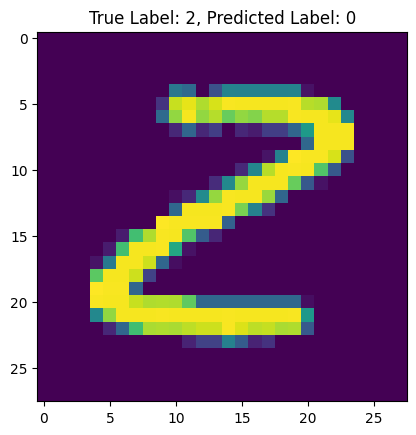

In [19]:

random_index = np.random.randint(0, high=len(X_test), size=None, dtype=int)
x = X_test[random_index][None]
y = np.argmax(y_test[random_index])

y_hat = net.forward_pass(x)
pred = np.argmax(y_hat)

plt.imshow(x.reshape([28,28]))
plt.title(f"True Label: {y}, Predicted Label: {pred}")
